## 要根据预创建的 Estimator 编写 TensorFlow 程序，您必须执行下列任务：

- 创建一个或多个输入函数。
- 定义模型的特征列。
- 实例化 Estimator，指定特征列和各种超参数。
- 在 Estimator 对象上调用一个或多个方法，传递适当的输入函数作为数据的来源。


In [30]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import argparse
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import iris_data

# 获得训练数据

In [31]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import pandas as pd

df = pd.read_csv('train_data/1_to_11_train_building.csv')
#打乱数据
for i in range(10):
    df=df.reindex(np.random.permutation(df.index))

In [32]:
df.head(4)

,Unnamed: 0,Unnamed: 0.1,loc_id,time,count,weekday,stage,is_weekend,month,day,hour,building,cat
219361,219361,219361,29,2017-09-04 12:00:00,2691,0,1,0,9,4,12,13,2
152534,152534,152534,20,2017-10-30 11:00:00,1940,0,1,0,10,30,11,12,3
180347,180347,180347,24,2017-07-27 07:00:00,153,3,2,0,7,27,7,17,3
223753,223753,223753,30,2017-04-11 05:00:00,198,1,0,0,4,11,5,9,1


### 各个建筑物人数分布

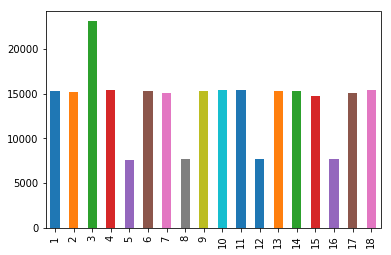

In [33]:
a=df['building'].value_counts()
a.sort_index().plot(kind='bar')

In [34]:
data_X = {'loc_id':df['loc_id'].values,'month':df['month'].values,
        'day':df['day'].values,'hour':df['hour'].values,
#           'stage':df['stage'].values,
         'weekday':df['weekday'].values,
         'is_weekend':df['is_weekend'].values,
          'building':df['building'].values,'cat':df['cat'].values
         }
data_y = {'count':df['count'].values}
df_train_X = pd.DataFrame(data=data_X)
df_train_y = pd.DataFrame(data=data_y)

In [35]:
df_train_X['building'] = df_train_X['building']-1
df_train_X['cat'] = df_train_X['cat']-1
df_train_X['day'] = df_train_X['day']-1
df_train_X['loc_id'] = df_train_X['loc_id']-1
df_train_X['month'] = df_train_X['month']-1

In [36]:
df_train_X.describe()

,building,cat,day,hour,is_weekend,loc_id,month,weekday
count,252013.000000,252013.000000,252013.000000,252013.000000,252013.000000,252013.000000,252013.000000,252013.000000
mean,8.194680,0.602759,14.603687,11.525338,0.286156,15.973303,5.062279,3.004805
std,5.329816,0.848723,8.823848,6.891378,0.451964,9.529865,3.173494,2.006589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,7.000000,6.000000,0.000000,8.000000,2.000000,1.000000
50%,8.000000,0.000000,14.000000,12.000000,0.000000,16.000000,5.000000,3.000000
75%,13.000000,1.000000,22.000000,17.000000,1.000000,24.000000,8.000000,5.000000
max,17.000000,2.000000,30.000000,23.000000,1.000000,32.000000,10.000000,6.000000


In [37]:
# num_train = int(df_train_X.shape[0]/5)
num_train = df_train_X.shape[0]
x = df_train_X[:-10000]
y = df_train_y['count'][:-10000]

In [38]:
# 总的训练数据
num_train

252013

### 获得评测模型准确率的数据

In [39]:
x_eval = df_train_X[-10000:]
y_eval = df_train_y['count'][-10000:]

### 获得预测数据

In [40]:
df = pd.read_csv('train_data/12_test_buiding.csv')

In [41]:
data_X_predict = {'loc_id':df['loc_id'].values,'month':df['month'].values,
        'day':df['day'].values,'hour':df['hour'].values,
#         'stage':df['stage'].values,
        'building':df['building'].values,'cat':df['cat'].values,
         'weekday':df['weekday'].values, 
         'is_weekend':df['is_weekend'].values
         }
df_test_X = pd.DataFrame(data=data_X_predict)

In [42]:
df_test_X['building'] = df_test_X['building']-1
df_test_X['cat'] = df_test_X['cat']-1
df_test_X['day'] = df_test_X['day']-1
df_test_X['loc_id'] = df_test_X['loc_id']-1
df_test_X['month'] = df_test_X['month']-1

In [43]:
x_predict = df_test_X

x_predict.describe()

,building,cat,day,hour,is_weekend,loc_id,month,weekday
count,24552.000000,24552.000000,24552.000000,24552.000000,24552.000000,24552.000000,24552.0,24552.000000
mean,8.212121,0.606061,15.000000,11.500000,0.322581,16.000000,11.0,3.193548
std,5.330170,0.850664,8.944454,6.922328,0.467473,9.522098,0.0,2.006793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0,0.000000
25%,3.000000,0.000000,7.000000,5.750000,0.000000,8.000000,11.0,1.000000
50%,8.000000,0.000000,15.000000,11.500000,0.000000,16.000000,11.0,3.000000
75%,13.000000,1.000000,23.000000,17.250000,1.000000,24.000000,11.0,5.000000
max,17.000000,2.000000,30.000000,23.000000,1.000000,32.000000,11.0,6.000000


# 构造输入函数

In [44]:
#训练模型输入函数
my_input_fn = tf.estimator.inputs.pandas_input_fn(x,y,shuffle=True)
#验证数据集输入函数
input_fn_eval = tf.estimator.inputs.pandas_input_fn(x_eval,y_eval,shuffle=True)
#预测数据集输入函数
input_fn_predict = tf.estimator.inputs.pandas_input_fn(x_predict,shuffle=False)

# 构造特征列

- 分类标志列
- 交叉列
- 嵌入列

其中嵌入列是DNN的输入特征列，分类标识列将月份等时间转换为独热编码，特别注意分桶的数量选择，例如0-12，分桶为13模型才不会报错，1-5的特征分桶为6，一次类推确定分桶的数字。

建议查看官方文档:https://tensorflow.google.cn/get_started/feature_columns#categorical_identity_column

In [45]:
my_feature_columns = []
# keys = ['day','hour','loc_id','month']

# for key in keys:
#     my_feature_columns.append(tf.feature_column.numeric_column(key=key))
day_idt = tf.feature_column.categorical_column_with_identity(key='day',num_buckets=31)
hour_idt = tf.feature_column.categorical_column_with_identity(key='hour',num_buckets=24)
loc_idt = tf.feature_column.categorical_column_with_identity(key='loc_id',num_buckets=33)
building_idt = tf.feature_column.categorical_column_with_identity(key='building',num_buckets=18)
cat_idt = tf.feature_column.categorical_column_with_identity(key='cat',num_buckets=3)
# 测试数据和预测数据一共12个月所以用12+1个桶
month_idt = tf.feature_column.categorical_column_with_identity(key='month',num_buckets=13)
stage_idt = tf.feature_column.categorical_column_with_identity(key='stage',num_buckets=3)

is_weekend_idt = tf.feature_column.categorical_column_with_identity(key='is_weekend',num_buckets=2)
weekday_idt = tf.feature_column.categorical_column_with_identity(key='weekday',num_buckets=7)

#### 添加cross feature

将两个特征组合交叉产生新的特征，详情：https://tensorflow.google.cn/get_started/feature_columns#crossed_column

In [46]:
weekday_x_isWeekend = tf.feature_column.crossed_column([weekday_idt, is_weekend_idt],15)

#### 添加embedding feature

DNN的常用输入特征，详情见：https://tensorflow.google.cn/get_started/feature_columns#indicator_and_embedding_columns

In [47]:
day_emb = tf.feature_column.embedding_column(day_idt,3)
hour_emb = tf.feature_column.embedding_column(hour_idt,3)
loc_emb = tf.feature_column.embedding_column(loc_idt,3)
month_emb = tf.feature_column.embedding_column(month_idt,3)
#stage_emb = tf.feature_column.embedding_column(stage_idt,2)
# is_weekend_emb = tf.feature_column.embedding_column(is_weekend_idt,2)
# weekday_emb = tf.feature_column.embedding_column(weekday_idt,2)
# 添加cross到embedding
weekday_x_isWeekend_emb = tf.feature_column.embedding_column(weekday_x_isWeekend, 2)

building_emb = tf.feature_column.embedding_column(building_idt,3)
cat_emb = tf.feature_column.embedding_column(cat_idt,2)

In [48]:
# DNN特征列
my_feature_columns = [day_emb, hour_emb, loc_emb, month_emb,
                      
#                       is_weekend_emb, weekday_emb,
                      weekday_x_isWeekend_emb,
                     building_emb, cat_emb]

In [49]:
my_feature_columns

[_EmbeddingColumn(categorical_column=_IdentityCategoricalColumn(key='day', num_buckets=31, default_value=None), dimension=3, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x7f85a568e940>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True),
 _EmbeddingColumn(categorical_column=_IdentityCategoricalColumn(key='hour', num_buckets=24, default_value=None), dimension=3, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x7f85a568ea20>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True),
 _EmbeddingColumn(categorical_column=_IdentityCategoricalColumn(key='loc_id', num_buckets=33, default_value=None), dimension=3, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x7f85a568ea90>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True),
 _EmbeddingColumn(categorical_column=_IdentityCategoricalColumn

# 选择DNN回归模型

In [50]:
clf = tf.estimator.DNNRegressor(
    feature_columns=my_feature_columns,
#     hidden_units=[23760/2,5120,51200,2048])
#     hidden_units=[120000,10240,10240,5120]
   hidden_units=[4096,1024,256])
#     hidden_units=[4096*2,512*2])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpl8xpxb7u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f85a56937f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# 训练模型、评测、预测

In [51]:
# for i in range(50000):
for i in range(5):
    clf.train(input_fn=my_input_fn,steps=10000)

# 小的step测试输入函数是否能正确预测
# clf.train(input_fn=my_input_fn,steps=10)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpl8xpxb7u/model.ckpt.
INFO:tensorflow:loss = 67188350.0, step = 1
INFO:tensorflow:global_step/sec: 23.3985
INFO:tensorflow:loss = 19882282.0, step = 101 (4.275 sec)
INFO:tensorflow:global_step/sec: 24.7333
INFO:tensorflow:loss = 25377378.0, step = 201 (4.043 sec)
INFO:tensorflow:global_step/sec: 24.6445
INFO:tensorflow:loss = 11084098.0, step = 301 (4.058 sec)
INFO:tensorflow:global_step/sec: 24.7444
INFO:tensorflow:loss = 4102409.0, step = 401 (4.041 sec)
INFO:tensorflow:global_step/sec: 24.8083
INFO:tensorflow:loss = 6507180.5, step = 501 (4.031 sec)
INFO:tensorflow:global_step/sec: 24.5251
INFO:tensorflow:loss = 5033039.0, step = 601 (4.077 sec)
INFO:tensorflow:global_step/sec: 23.7543
INFO:tensorf

# 模型评估
### 所有数据集训练完成后各个模型的准确率
- 线性回归 average_loss：72943
- SVM average_loss：10000
- DNN average_loss：3000

In [52]:
clf.evaluate(input_fn=input_fn_eval,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-02-03:29:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl8xpxb7u/model.ckpt-9455
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-02-03:29:45
INFO:tensorflow:Saving dict for global step 9455: average_loss = 20992.447, global_step = 9455, loss = 2657271.8


{'average_loss': 20992.447, 'global_step': 9455, 'loss': 2657271.8}

# 模型预测

### 将预测的数据保存到列表中

In [53]:
res = clf.predict(input_fn=input_fn_predict)
ans_list = []
for line in res:
    ans_list.append(line['predictions'][0])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl8xpxb7u/model.ckpt-9455
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


### 生成提交数据

In [54]:
y = pd.DataFrame({'col':[e for e in ans_list]})
y = pd.DataFrame({'col':[e for e in ans_list]})
y.head()

,col
0,274.870026
1,511.686676
2,107.733925
3,111.235054
4,232.561981


In [55]:
y.describe()

,col
count,24552.000000
mean,391.714096
std,403.272182
min,-52.339867
25%,135.288189
50%,302.781830
75%,491.421661
max,4015.220459


In [56]:
df_y = pd.read_csv('train_data/12_test_buiding.csv')

In [57]:
df_y.describe()

,Unnamed: 0,Unnamed: 0.1,loc_id,weekday,stage,is_weekend,month,day,hour,building,cat
count,24552.000000,24552.000000,24552.000000,24552.000000,24552.000000,24552.000000,24552.0,24552.000000,24552.000000,24552.000000,24552.000000
mean,12275.500000,12275.500000,17.000000,3.193548,1.166667,0.322581,12.0,16.000000,11.500000,9.212121,1.606061
std,7087.696241,7087.696241,9.522098,2.006793,0.849854,0.467473,0.0,8.944454,6.922328,5.330170,0.850664
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.0,1.000000,0.000000,1.000000,1.000000
25%,6137.750000,6137.750000,9.000000,1.000000,0.000000,0.000000,12.0,8.000000,5.750000,4.000000,1.000000
50%,12275.500000,12275.500000,17.000000,3.000000,1.000000,0.000000,12.0,16.000000,11.500000,9.000000,1.000000
75%,18413.250000,18413.250000,25.000000,5.000000,2.000000,1.000000,12.0,24.000000,17.250000,14.000000,2.000000
max,24551.000000,24551.000000,33.000000,6.000000,2.000000,1.000000,12.0,31.000000,23.000000,18.000000,3.000000


### 画图查看预测的数据是否有异常

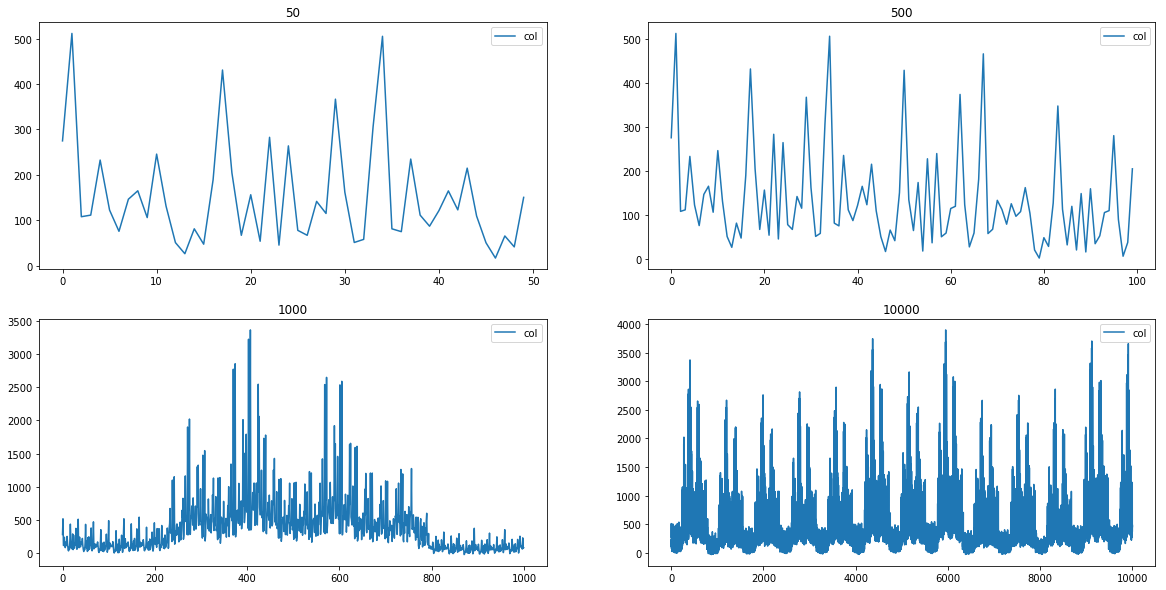

In [58]:
fig, axes =plt.subplots(nrows=2, ncols=2,figsize=(20, 10))
y[:50].plot(ax=axes[0,0])
axes[0,0].set_title('50')
axes[0,1].set_title('500')
axes[1,0].set_title('1000')
axes[1,1].set_title('10000')
y[:100].plot(ax=axes[0,1])
y[:1000].plot(ax=axes[1,0])
y[:10000].plot(ax=axes[1,1])

### 将数据中小于0的转化为0

In [59]:
y_list = y.values.tolist()

y_remove_0 = []
for e in ans_list:
    if e<0:
        y_remove_0.append(0);
    else:
        y_remove_0.append(e)
y=y_remove_0

#### 合并测试数据和预测的数据到一个csv

In [ ]:
data = {'loc_id':df_y.loc_id,'time_stamp':df_y.time_stamp,'num_of_people':y}
df_ans_submit = pd.DataFrame(data=data)
# df_ans_submit['num_of_people'] = y

df_ans_submit['num_of_people'].describe()

df_ans_submit.shape

columns = ['loc_id','time_stamp','num_of_people']
df_ans_submit.to_csv('Final_2.csv',index=False,columns=columns)